In [9]:
import pandas as pd
import util
import matplotlib.pyplot as plt
import numpy as np

In [112]:
df = util.read_json_as_df('data/volvo.json')

df = df[df.Fetched != False & df['Pojemność skokowa'].notnull()]
df['Pojemność skokowa'] = df['Pojemność skokowa'].str.replace(' ', '').str.slice(0, -3, 1).astype(float).astype('Int32')
df['Pojemność skokowa'] = (df['Pojemność skokowa'] / 100).apply(np.round).astype(float) *100
df['Rok produkcji'] = df['Rok produkcji'].astype('Int32')
df['Przebieg'] = df['Przebieg'].str.replace(' ', '').str.slice(0, -2, 1).astype(float).astype('Int32')
df

,Id,Fetched,Link,Oferta od,Kategoria,Marka pojazdu,Model pojazdu,Rok produkcji,Przebieg,Pojemność skokowa,...,lub do (przebieg km),Filtr cząstek stałych,Akryl (niemetalizowany),Uszkodzony,Emisja CO2,Faktura VAT,Kierownica po prawej (Anglik),Gwarancja dealerska (w cenie),Leasing,Miesięczna rata
0,6077424293,True,https://www.otomoto.pl/oferta/volvo-c30-bardzo...,Osoby prywatnej,Osobowe,Volvo,C30,2008,92469,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6076989418,True,https://www.otomoto.pl/oferta/volvo-c30-volvo-...,Osoby prywatnej,Osobowe,Volvo,C30,2009,145000,1800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6077423968,True,https://www.otomoto.pl/oferta/volvo-c30-volvo-...,Osoby prywatnej,Osobowe,Volvo,C30,2008,260000,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6076124048,True,https://www.otomoto.pl/oferta/volvo-c30-1-6dri...,Firmy,Osobowe,Volvo,C30,2010,207000,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6075755904,True,https://www.otomoto.pl/oferta/volvo-c30-volvo-...,Osoby prywatnej,Osobowe,Volvo,C30,2010,203000,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,6076631827,True,https://www.otomoto.pl/oferta/volvo-c30-ID6DeW...,Firmy,Osobowe,Volvo,C30,2007,258000,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,6076621214,True,https://www.otomoto.pl/oferta/volvo-c30-ID6DeS...,Osoby prywatnej,Osobowe,Volvo,C30,2009,179700,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,6077198362,True,https://www.otomoto.pl/oferta/volvo-c30-rdesig...,Firmy,Osobowe,Volvo,C30,2011,197000,1600.0,...,NaN,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,6076340214,True,https://www.otomoto.pl/oferta/volvo-c30-2007r-...,Firmy,Osobowe,Volvo,C30,2007,133035,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Id', 'Fetched', 'Link', 'Oferta od', 'Kategoria', 'Marka pojazdu',
       'Model pojazdu', 'Rok produkcji', 'Przebieg', 'Pojemność skokowa',
       'Rodzaj paliwa', 'Moc', 'Skrzynia biegów', 'Napęd', 'Typ',
       'Liczba drzwi', 'Liczba miejsc', 'Kolor', 'Metalik', 'VAT marża',
       'Kraj pochodzenia', 'Pierwsza rejestracja',
       'Numer rejestracyjny pojazdu', 'Bezwypadkowy', 'Serwisowany w ASO',
       'Stan', 'Wyposazenie', 'Opis', 'Cena', 'Waluta', 'Wersja',
       'Zarejestrowany w Polsce', 'Perłowy', 'Tuning',
       'Możliwość finansowania', 'Pierwszy właściciel', 'lub do (przebieg km)',
       'Filtr cząstek stałych', 'Akryl (niemetalizowany)', 'Uszkodzony',
       'Emisja CO2', 'Faktura VAT', 'Kierownica po prawej (Anglik)',
       'Gwarancja dealerska (w cenie)', 'Leasing', 'Miesięczna rata'],
      dtype='object')

In [116]:
grouped = df.groupby(['Rok produkcji', 'Rodzaj paliwa', 'Pojemność skokowa']).agg({
        column: ['min', 'max', 'mean', 'median', 'count',]
        for column in ['Cena', ]
    })
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
grouped

Cena_min  Cena_max  \
Rok produkcji Rodzaj paliwa Pojemność skokowa                       
2005          Benzyna       2500.0              26900.0   26900.0   
2006          Benzyna+LPG   1800.0              15900.0   15900.0   
                            2000.0              14500.0   14500.0   
              Diesel        2000.0              11500.0   12500.0   
2007          Benzyna       1600.0              14900.0   20000.0   
                            1800.0              15990.0   18800.0   
                            2500.0              21900.0   26500.0   
              Benzyna+LPG   1800.0              15700.0   15700.0   
                            2000.0              16800.0   24900.0   
              Diesel        1600.0               6250.0   18900.0   
                            2000.0              10900.0   18900.0   
                            2400.0               7999.0   19900.0   
2008          Benzyna       1600.0              16300.0   17999.0   
                            1800.0              19900.0   21900.0   
                            2000.0              15900.0   15900.0   
              Benzyna+LPG   1600.0              16000.0   16000.0   
                            2000.0              17999.0   21900.0   
              Diesel        1600.0              12500.0   22000.0   
                            2000.0              12000.0   24999.0   
2009          Benzyna       1600.0              14900.0   18900.0   
                            1800.0              21900.0   21900.0   
                            2500.0              29000.0   29900.0   
              Benzyna+LPG   1800.0              19500.0   19500.0   
              Diesel        1600.0              11000.0   17450.0   
                            2000.0              15800.0   29900.0   
                            2400.0              13900.0   13900.0   
2010          Benzyna       1600.0              18900.0   25400.0   
              Diesel        1600.0               9900.0   26000.0   
                            2000.0               7400.0   29000.0   
2011          Benzyna       2000.0              38900.0   38900.0   
              Diesel        1600.0              10900.0   29900.0   
                            2000.0              33900.0   33900.0   
2012          Benzyna       2000.0              23900.0   23900.0   
              Diesel        1600.0              16900.0   36900.0   
2013          Diesel        1600.0              22900.0   35900.0   

                                                  Cena_mean  Cena_median  \
Rok produkcji Rodzaj paliwa Pojemność skokowa                              
2005          Benzyna       2500.0             26900.000000      26900.0   
2006          Benzyna+LPG   1800.0             15900.000000      15900.0   
                            2000.0             14500.000000      14500.0   
              Diesel        2000.0             11966.666667      11900.0   
2007          Benzyna       1600.0             17316.666667      17300.0   
                            1800.0             17563.333333      17900.0   
                            2500.0             24300.000000      24500.0   
              Benzyna+LPG   1800.0             15700.000000      15700.0   
                            2000.0             20200.000000      18900.0   
              Diesel        1600.0             13436.451613      12900.0   
                            2000.0             14872.600000      15800.0   
                            2400.0             13949.500000      13949.5   
2008          Benzyna       1600.0             17149.500000      17149.5   
                            1800.0             20900.000000      20900.0   
                            2000.0             15900.000000      15900.0   
              Benzyna+LPG   1600.0             16000.000000      16000.0   
                            2000.0             19949.500000      19949.5   
              Diesel        1600.0             14

In [123]:
szukane = df[(df['Rok produkcji'] == 2007) & df['Rodzaj paliwa'].str.contains('Diesel') & (df['Pojemność skokowa'] == 1600)]
szukane

,Id,Fetched,Link,Oferta od,Kategoria,Marka pojazdu,Model pojazdu,Rok produkcji,Przebieg,Pojemność skokowa,...,lub do (przebieg km),Filtr cząstek stałych,Akryl (niemetalizowany),Uszkodzony,Emisja CO2,Faktura VAT,Kierownica po prawej (Anglik),Gwarancja dealerska (w cenie),Leasing,Miesięczna rata
7,6076406330,True,https://www.otomoto.pl/oferta/volvo-c30-r-desi...,Osoby prywatnej,Osobowe,Volvo,C30,2007,166800,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,6077218436,True,https://www.otomoto.pl/oferta/volvo-c30-zareje...,Firmy,Osobowe,Volvo,C30,2007,171000,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,6075118286,True,https://www.otomoto.pl/oferta/volvo-c30-1-6-di...,Osoby prywatnej,Osobowe,Volvo,C30,2007,236000,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,6071467433,True,https://www.otomoto.pl/oferta/volvo-c30-volvo-...,Osoby prywatnej,Osobowe,Volvo,C30,2007,266400,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,6050141264,True,https://www.otomoto.pl/oferta/volvo-c30-zadban...,Firmy,Osobowe,Volvo,C30,2007,229000,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,6077467443,True,https://www.otomoto.pl/oferta/volvo-c30-przepi...,Osoby prywatnej,Osobowe,Volvo,C30,2007,193000,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,6077462503,True,https://www.otomoto.pl/oferta/volvo-c30-bardzo...,Osoby prywatnej,Osobowe,Volvo,C30,2007,178000,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,6077425729,True,https://www.otomoto.pl/oferta/volvo-c30-klima-...,Firmy,Osobowe,Volvo,C30,2007,268832,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,6075867792,True,https://www.otomoto.pl/oferta/volvo-c30-volvo-...,Osoby prywatnej,Osobowe,Volvo,C30,2007,220000,1600.0,...,NaN,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,6075626432,True,https://www.otomoto.pl/oferta/volvo-c30-nowe-s...,Firmy,Osobowe,Volvo,C30,2007,220246,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


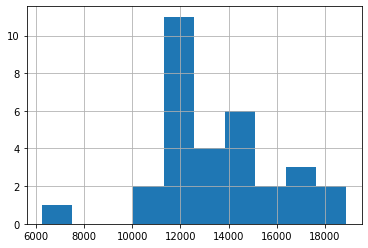

In [125]:
szukane['Cena'].hist()

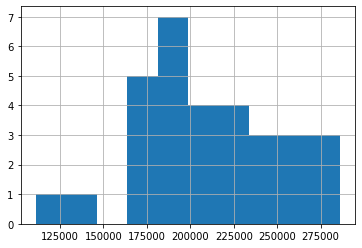

In [126]:
szukane['Przebieg'].hist()